<h1><b>CSE 353:MACHINE LEARNING</b></h1>
<h3><b>PRACTICAL HOMEWORK 1 - USING PYTORCH TO BUILD AND TRAIN SIMPLE DEEP NEURAL NETWORKS</b></h3>


---



**Due date: 11:59pm on December 09, 2024**

In this semester, we will use Google Colab for the assignments, which allows us to utilize resources that some of us might not have in their local machines such as GPUs. You will need to use your Stony Brook (*.stonybrook.edu) account for coding and Google Drive to save your results.

## Google Colab Tutorial
---
Go to https://colab.research.google.com/notebooks/, you will see a tutorial named "Welcome to Colaboratory" file, where you can learn the basics of using google colab.

Settings used for assignments: ***Edit -> Notebook Settings -> Runtime Type (Python 3)***.


## Description
---
This project is an introduction to deep learning. You will build and train simple DNN architecures for regression and multi-label classification using [PyTorch](http://pytorch.org). This assignment acts as a "Hello World!" program for you to enter into the realm of building, training and testing DNN architectures.  

By the end of this assignment, you are expected to have a basic understanding of how to build and train DNNs for simple classification and regression tasks. This project will prepare you for upcoming domain specific ML problems that requires much complex architectures.


## Some Tutorials (PyTorch)
---
- You will be using PyTorch for deep learning toolbox (follow the [link](http://pytorch.org) for installation).
- For PyTorch beginners, please read this [tutorial](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) before doing your homework.
- Feel free to study more tutorials at http://pytorch.org/tutorials/.
- Find cool visualization here at http://playground.tensorflow.org.



---



---



# Introduction to Deep Learning

Some of the most impressive advances in artificial intelligence in recent years have been in the field of deep learning. Natural language translation, image recognition, and game playing are all tasks where deep learning models have neared or even exceeded human-level performance.

So what is deep learning? Deep learning is an approach to machine learning characterized by deep stacks of computations. This depth of computation is what has enabled deep learning models to disentangle the kinds of complex and hierarchical patterns found in the most challenging real-world datasets.

Through their power and scalability neural networks have become the defining model of deep learning. Neural networks are composed of neurons, where each neuron individually performs only a simple computation. The power of a neural network comes instead from the complexity of the connections these neurons can form.

<b>IMPORT LIBRARIES</b>

- Import the PyTorch library and the necessary modules for all the code blocks below for building and training a deep neural network.

- Note that we will also import required libraries in the subsequent code sections as this would help you understand what exact libraries are used in each code block.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Part 1: Regression (40/100)


In this part, we will see how a regression problem is trained on a neural network. Regression is a supervised learning technique used to predict a dependent variable based on one or more independent variables by estimating a relationship between them.

### 1.1 - Load Dataset

In this step, We generate the regression dataset using the sklearn library. sklearn library provides us with multiple example datasets that we can use to train or model.

After loading the dataset, you need to split the dataset into training and test datasets. For this example, you can split the dataset into 70% for training and 30% for testing. To achieve this functionalty, sklearn provides us with an inbuilt interface - "train_test_split" to split our data. We split the (X, y) data into (X_train, X_test, y_train, y_test) variables

In [ ]:
# Import Regression data
from sklearn.datasets import make_regression

# Import "train_test_split" API to split the raw data into training and test data
from sklearn.model_selection import train_test_split

def generate_regression_dataset(n_samples=1000, n_features=3, noise=15, random_state=42):

  X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=noise, random_state=random_state)

  # Convert to PyTorch tensors
  ##### ---------- INSERT YOUR CODE HERE ---------- #####
  X = torch.tensor(X, dtype=torch.float64)
  y = torch.tensor(y, dtype=torch.float64)
  ##### ---------- END CODE HERE ---------- #####


  # Split the data: 70% for training, 30% for testing
  ##### ---------- INSERT YOUR CODE HERE ---------- #####
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=random_state)

  ##### ---------- END CODE HERE ---------- #####

  # Display the shape of the data
  print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")
  print(f"Training data shape: {y_train.shape}, Test data shape: {y_test.shape}")

  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = generate_regression_dataset()

Training data shape: torch.Size([700, 3]), Test data shape: torch.Size([300, 3])
Training data shape: torch.Size([700]), Test data shape: torch.Size([300])


### 1.2 - Define the Model


In this section, we build a **simple neural network for regression** using PyTorch. Below is a summary of what the model aims to achieve and how it is constructed:

**1. Framework: PyTorch**
- PyTorch is used to define and train neural networks.
- Models are built by subclassing `nn.Module`, which provides all the necessary components for layers and operations.

**2. Problem Goal**
- This model predicts a **single continuous value** (e.g., house price) from **3 input features** (e.g., size, number of rooms, and year built).
- Since this is a **regression problem**, the output is a continuous value, not a category.

**3. Model Architecture**
- **Input Layer:** Takes 3 features as input and passes them to the first hidden layer.
- **Two Hidden Layers:** Each with 16 neurons, using **ReLU activation** to introduce non-linearity.
- **Output Layer:** A single neuron, producing the final predicted value.

**4. Forward Propagation**
- The **input** flows through the layers:
    1. Input -> Hidden Layer 1 (ReLU)
    2. Hidden Layer 1 -> Hidden Layer 2 (ReLU)
    3. Hidden Layer 2 -> Output (Linear, no activation)

**5. Why Use ReLU Activation?**
- **ReLU (Rectified Linear Unit)** helps prevent the vanishing gradient problem and enables the model to learn efficiently.


In [ ]:
class RegressionNet(nn.Module):
    def __init__(self):
        super(RegressionNet, self).__init__()

        self.input_dim = 3
        self.hidden_dim = 16
        self.output_dim = 1

        # Define layers to build the model
        ##### ---------- INSERT YOUR CODE HERE ---------- #####

        self.layer_1 = nn.Linear(self.input_dim, self.hidden_dim)
        nn.init.kaiming_uniform_(self.layer_1.weight, nonlinearity="relu")

        self.layer_2 = nn.Linear(self.hidden_dim, self.hidden_dim)
        nn.init.kaiming_uniform_(self.layer_2.weight, nonlinearity="relu")

        self.output_layer = nn.Linear(self.hidden_dim, self.output_dim)

        self.double()

        ##### ---------- END CODE HERE ---------- #####

    def forward(self, x):
        output = None

        # Calculate the forward pass and store it in "output" variable defined above.
        ##### ---------- INSERT YOUR CODE HERE ---------- #####

        x = torch.nn.functional.relu(self.layer_1(x))
        x = torch.nn.functional.relu(self.layer_2(x))
        output = self.output_layer(x) # no need for an activation function
        output = output.squeeze(-1)  # squeeze the last dimension


        ##### ---------- END CODE HERE ---------- #####

        return output

# Initialize the model
model = RegressionNet()
print(model)


RegressionNet(
  (layer_1): Linear(in_features=3, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (output_layer): Linear(in_features=16, out_features=1, bias=True)
)


### 1.3 - Loss Function and Optimizer

This section defines two key components for training our **neural network**: the **loss function** and the **optimizer**.

**1. Learning Rate**
- **Learning rate (`lr`)**: A small value (like 0.01) that determines **how fast the model updates its weights** during training.  
- A well-tuned learning rate helps the model converge faster without overshooting the optimal solution.

**2. Criterion: Loss Function - Mean Squared Error (MSE)**
- **`nn.MSELoss()`**: A standard loss function for **regression tasks**.
  - It calculates the **mean squared difference** between the predicted and actual values.
  - The model tries to minimize this error during training, improving the prediction accuracy.

**3. Optimizer: Adam**
- **Adam Optimizer (`optim.Adam`)**:
  - A popular optimization algorithm that **adjusts the learning rate** during training based on past gradients.
  - It combines the benefits of **momentum and adaptive learning rates**, leading to faster convergence.

**4. How It Works in Training**
- During training, the **optimizer updates the weights** of the network using:
    - The **gradients of the loss function** with respect to the model parameters.
    - The **learning rate** to control the size of each update step.

This setup provides a good starting point for training a regression model. Students can experiment with **different optimizers** (like SGD) or **tune the learning rate** to see how it affects performance.


In [ ]:
# -----------------------------------------------
# 1. Define Hyperparameters
# -----------------------------------------------
learning_rate = 0.01  # Learning rate for the optimizer

# -----------------------------------------------
# 2. Set Loss Function and Optimizer
# -----------------------------------------------

##### ---------- INSERT YOUR CODE HERE ---------- #####

criterion =  nn.MSELoss()   # Define MSE criterion here
optimizer =  optim.Adam(model.parameters(), lr=learning_rate)   # Define the torch's adam optimizer here

##### ---------- END CODE HERE ---------- #####

# Print criterion and optimizer for verification
print("Loss Function:", criterion)
print("Optimizer:", optimizer)


Loss Function: MSELoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)


### 1.4 - Training

This section defines the **training loop** for the neural network. Training involves multiple **forward and backward passes** to update the model’s parameters and minimize the loss. Below is a breakdown of the components:

**1. Number of Epochs**
- **Epoch (`num_epochs`)**: An epoch refers to **one complete pass** over the entire training dataset.
- We use **500 epochs** to allow the model enough time to learn patterns in the data.


**2. Forward Pass**
- During the **forward pass**, the input data is passed through the model to produce predictions (`y_pred`).
- **Loss Calculation**:  
  - The predicted values (`y_pred`) are compared with the actual targets (`y_train`) using the **MSE loss function**:
    ```python
    loss = criterion(y_pred, y_train)
    ```
  - This step measures how well the model’s predictions match the actual data.


**3. Backward Pass and Optimization**
- **Gradient Calculation**:  
  - We compute the **gradients of the loss** with respect to the model parameters using:
    ```python
    loss.backward()
    ```
- **Zeroing Previous Gradients**:  
  - Before each update, we clear the previously stored gradients:
    ```python
    optimizer.zero_grad()
    ```
- **Parameter Update**:  
  - The optimizer updates the **weights and biases** of the model using the calculated gradients:
    ```python
    optimizer.step()
    ```


**4. Printing Loss During Training**
- To monitor training progress, we print the **loss value** every 50 epochs:
    ```python
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
    ```
- This provides a sense of how well the model is learning over time. A **decreasing loss** indicates that the model is improving.


**5. Summary**
This training loop allows the model to learn by **minimizing the loss** through multiple forward and backward passes. Students can modify:
- **Number of epochs** (e.g., 1000 instead of 500)
- **Learning rate** to speed up or slow down training
- **Model architecture** for better performance


In [ ]:
# -----------------------------------------------
# 1. Define Training Parameters
# -----------------------------------------------
num_epochs = 500  # Number of times the model will see the entire dataset

# -----------------------------------------------
# 2. Training Loop
# -----------------------------------------------
for epoch in range(num_epochs):
    # ------------------ Forward Pass ------------------
    ##### ---------- INSERT YOUR CODE HERE ---------- #####

    optimizer.zero_grad()

    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    ##### ---------- END CODE HERE ---------- #####

    # -------------- Backward Pass & Optimization --------------
    ##### ---------- INSERT YOUR CODE HERE ---------- #####

    loss.backward()
    optimizer.step()

    ##### ---------- END CODE HERE ---------- #####

    # -------------- Print Loss Every 50 Epochs --------------
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [50/500], Loss: 7458.0714
Epoch [100/500], Loss: 420.6262
Epoch [150/500], Loss: 292.4220
Epoch [200/500], Loss: 261.6439
Epoch [250/500], Loss: 242.8645
Epoch [300/500], Loss: 229.8237
Epoch [350/500], Loss: 223.1279
Epoch [400/500], Loss: 219.7589
Epoch [450/500], Loss: 217.6254
Epoch [500/500], Loss: 215.9204


### 1.5 - Evaluation

Once the model is trained, the next step is to **evaluate its performance** on unseen test data. This helps assess how well the model has generalized beyond the training set. Below are the steps to perform this task

**1. Disabling Gradient Computation with `torch.no_grad()`**
- **Why?**  
  - During evaluation, we don't need to compute or store gradients. This makes the evaluation faster and **saves memory**.
  - We use the `torch.no_grad()` context to **disable gradient tracking**:
    ```python
    with torch.no_grad():
        y_test_pred = model(X_test)
    ```
- This is only for efficient computation and doesn't intersect the concepts of ML. Do not spend more time digging deep into this, if you dont understand this segment. This is just for your additional learning.

**2. Predicting Test Data (`y_test_pred`)**
- The model takes the **test inputs (`X_test`)** and produces predictions using the trained weights.
- This helps us see how well the model performs on data it hasn’t seen during training.

**3. Calculating the Test Loss (MSE)**
- We use the **MSE loss function** to calculate the **test Mean Squared Error**:
    ```python
    mse = criterion(y_test_pred, y_test).item()
    ```
- **`item()`**: Extracts the scalar value from the tensor to display it.

**4. Printing the Test Loss**
- The final **MSE value** provides an indication of how well the model's predictions match the true test values. A lower MSE means better performance:
    ```python
    print(f'Test MSE: {mse:.4f}')
    ```




In [ ]:
# -----------------------------------------------
# 1. Model Evaluation
# -----------------------------------------------
##### ---------- INSERT YOUR CODE HERE ---------- #####

with torch.no_grad():
    y_test_pred = model(X_test)
    mse = criterion(y_test_pred, y_test).item()

    print(f'Test MSE: {mse:.4f}')


##### ---------- END CODE HERE ---------- #####


Test MSE: 238.9651


### Visualization

Run the below cell to see how your model performed. This will give you an eagle-eye's view on the entire test dataset and how much the predicted values deviated from the actual values.

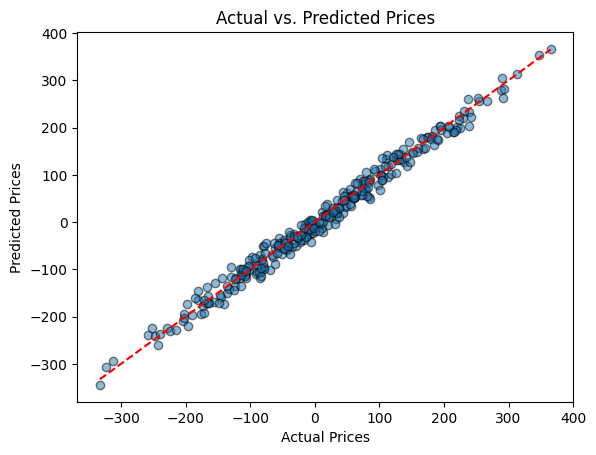

In [ ]:
# Convert tensors to NumPy for plotting
y_test_np = y_test.numpy()
y_test_pred_np = y_test_pred.numpy()

# Plot actual vs predicted prices
plt.scatter(y_test_np, y_test_pred_np, alpha=0.5, edgecolors='k')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--')  # Reference line
plt.show()


# Part 2: MNIST Classification (60/100)

In this section, We will train a model to classify images of hand written digits (0-9) into actual digits. For this, we are using a popular dataset - MNIST, where each image is of size 28 x 28

## 2.1 - Load and Preprocess MNIST Data

This section demonstrates how to **load and prepare the MNIST dataset** using PyTorch’s `torchvision` library. MNIST is a popular dataset of handwritten digits (0–9) that is commonly used for training image classification models. Below is a breakdown of each component.

**1. Data Transformations**
- **Why?**  
  - Before feeding images into the model, they must be **converted to tensors** and **normalized**.
  - **`transforms.ToTensor()`**, **`transforms.Normalize((0.5,), (0.5,))`**: Explore these methods to convert the images from PIL format to PyTorch tensors and normalize them.
  - Explore the **`transforms.Compose()`** method to build a data transformation pipeline.

**2. Loading the MNIST Dataset**
- **Training Dataset**:
    ```python
    train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
    ```
    - Downloads the training portion of MNIST and applies the defined transformations.

- **Test Dataset**:
    ```python
    test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
    ```
    - Similarly, loads the test portion of MNIST for evaluation.

**3. Creating Data Loaders**
- **Why Use DataLoaders?**  
  - DataLoaders help manage datasets efficiently by **loading data in batches** during training.
  - **Batching** improves memory usage and speeds up computation.
  
- **DataLoader Code**:
  - **Training Data**: Batches of 64 samples with **shuffling** (to prevent the model from learning the order).
  - **Test Data**: Batches of 64 samples without shuffling (since order doesn’t affect evaluation).
   - **`Dataloader()`** : Learn about this interface to create dataloaders.
   - For eg, training data loader looks like this:
        ```python
        train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
        ```

**4. Checking Data Sizes**
- **Why Check Sizes?**  
  - It's important to ensure the data was loaded correctly. We use:
    ```python
    print(f"Number of training samples: {len(train_dataset)}")
    print(f"Number of test samples: {len(test_dataset)}")
    ```
  - The **MNIST dataset** contains:
    - 60,000 training samples
    - 10,000 test samples



In [ ]:
# -----------------------------------------------
# 1. Import Required Modules
# -----------------------------------------------
import torchvision  # PyTorch's library for datasets and transforms
from torchvision import transforms  # For data transformation
from torch.utils.data import DataLoader  # For loading data in batches

# -----------------------------------------------
# 2. Define Data Transformations
# -----------------------------------------------
##### ---------- INSERT YOUR CODE HERE ---------- #####

# compose multiple transformation in one
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

##### ---------- END CODE HERE ---------- #####

# -----------------------------------------------
# 3. Load Training and Test Datasets
# -----------------------------------------------
# Load train and test datasets into variables: "train_dataset" and "test_dataset"
##### ---------- INSERT YOUR CODE HERE ---------- #####

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

##### ---------- END CODE HERE ---------- #####

# -----------------------------------------------
# 4. Create Data Loaders
# -----------------------------------------------
# Just like above, you have to define two dataloaders, "train_loader" and "test_loader"
##### ---------- INSERT YOUR CODE HERE ---------- #####

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

##### ---------- END CODE HERE ---------- #####

# -----------------------------------------------
# 5. Check Data Shape and Sizes
# -----------------------------------------------
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")


Number of training samples: 60000
Number of test samples: 10000


### Visualize Sample Data

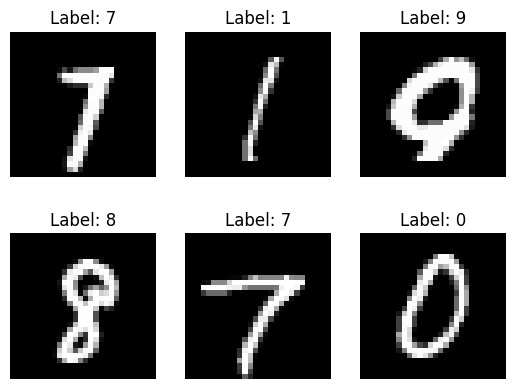

In [ ]:
### Note: This code block won't run until you define the "train_loader" properly in the above code block

examples = iter(train_loader)
images, labels = next(examples)
# Plot some sample images
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(f'Label: {labels[i].item()}')
    plt.axis('off')
plt.show()


### 2.2 - Build the Model

In this section, we define a **neural network (MNISTNet)** to classify handwritten digits from the MNIST dataset. Each image in MNIST is of size **28x28 pixels** and belongs to one of **10 classes** (digits 0–9). Below is a breakdown of the code.

**1. Network Architecture**
- **Fully Connected Layers (`nn.Linear`)**:  
  - We use **fully connected (dense) layers** where every neuron is connected to every neuron in the next layer.
  - **Input Layer (fc1)**:  
    - Input: Flattened 28x28 image = **784 features**  
    - Output: **128 neurons**  
  - **Hidden Layer (fc2)**:  
    - Input: **128 neurons**  
    - Output: **64 neurons**  
  - **Output Layer (fc3)**:  
    - Input: **64 neurons**  
    - Output: **10 neurons** (one for each class 0–9)

**2. Activation Functions**
- **ReLU (Rectified Linear Unit)**:  
  - We use **ReLU activations** after each hidden layer to introduce non-linearity:

**3. Forward Pass**
- **Flattening the Input**:  
  - Each image is a **28x28** tensor, but the model expects a **1D vector**.  
  - **`x.view()`** : Explore this method to flatten the input:
- **Forward Pass Logic**:
    - Input goes through `fc1` and `fc2` layers with ReLU activations.
    - The final output is obtained from `fc3` without any activation since this is a **classification problem** (logits will be passed to `CrossEntropyLoss` during training).

**4. Model Initialization**
- **Initializing the Model**:
    ```python
    model = MNISTNet()
    print(model)
    ```
  - This initializes and prints the architecture of the neural network.

   


In [ ]:
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()

        ##### ---------- INSERT YOUR CODE HERE ---------- #####

        self.fc1 = nn.Linear(784, 128)
        torch.nn.init.kaiming_uniform_(self.fc1.weight, nonlinearity='relu')

        self.fc2 = nn.Linear(128, 64)
        torch.nn.init.kaiming_uniform_(self.fc2.weight, nonlinearity='relu')

        self.fc3 = nn.Linear(64, 10)


        ##### ---------- END CODE HERE ---------- #####


    def forward(self, x):
        output = None
        # Note that before passing to first layer, you have to flatten your input. Explore x.view() before you start below.
        ##### ---------- INSERT YOUR CODE HERE ---------- #####

        x = x.view(-1, 784)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        output = self.fc3(x)

        ##### ---------- END CODE HERE ---------- #####

        return output

# Initialize the model
model = MNISTNet()
print(model)


MNISTNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


### 2.2 - Loss Criterion and Optimizer

This section sets up the **loss function** and **optimizer** for training the neural network. Both play a key role in how the model learns from data. Below is a breakdown of the components.

**1. Learning Rate**
- **`learning_rate = 0.001`**:  
  - The learning rate determines **how much the model's parameters are adjusted** during optimization.  
  - A **smaller learning rate** makes training more stable but slower.  
  - **Larger learning rates** can speed up training but risk overshooting the optimal solution.

**2. Loss Function**
- **What is a loss function?**  
  - A **loss function** measures the error between the model's predictions and the true labels.  
  - **Cross-Entropy Loss** (`nn.CrossEntropyLoss`) is widely used for **multi-class classification problems** like MNIST.  
  - **Why Cross-Entropy?**  
    - It penalizes the model more for **incorrect predictions** by considering both the predicted probabilities and the correct labels.

**3. Optimizer**
- **What is an optimizer?**  
  - The optimizer updates the model's parameters (weights) to **minimize the loss** function.  
  - We use **Adam optimizer** (`optim.Adam`) because it:
    - Combines the benefits of **momentum** and **adaptive learning rates**.
    - Works well for large datasets and complex models.
  
    ```python
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    ```



In [ ]:
# -----------------------------------------------
# 2. Set Loss Function and Optimizer
# -----------------------------------------------
##### ---------- INSERT YOUR CODE HERE ---------- #####

learning_rate = 0.001

criterion =  nn.CrossEntropyLoss()

optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)

##### ---------- END CODE HERE ---------- #####

# Print criterion and optimizer for verification
print("Loss Function:", criterion)
print("Optimizer:", optimizer)


Loss Function: CrossEntropyLoss()
Optimizer: RMSprop (
Parameter Group 0
    alpha: 0.99
    capturable: False
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    weight_decay: 0
)


### 2.4 - Training

This section contains the **training loop** for our neural network, where the model learns to classify MNIST digits through multiple iterations. Each epoch includes **forward and backward passes** with optimization steps. Below is a detailed explanation of each part.

**1. Epochs and Iterations**
- **What is an epoch?**  
  - An **epoch** refers to one complete pass through the entire dataset by the model.
  - **`num_epochs = 5`**: The model will see all the training data 5 times.

**2. Forward Pass**
- **What happens during the forward pass?**  
  - The model generates **predictions** for a batch of images:
  - The **loss function** compares the predicted values (`outputs`) with the actual labels (`labels`):

**3. Backward Pass and Optimization**
- **Why do we need a backward pass?**  
  - The backward pass calculates the **gradients** (partial derivatives) of the loss with respect to the model’s parameters, helping the model improve.
  
  - **Steps in backward pass and optimization:**
    - **`optimizer.zero_grad()`**: Clears previous gradients to avoid accumulation.
    - **`loss.backward()`**: Backpropagates gradients through the network.
    - **`optimizer.step()`**: Adjusts model parameters based on gradients.

**4. Monitoring Loss**
- **Why monitor loss?**  
  - Printing the loss after each epoch helps us keep track of the model’s learning progress.
    ```python
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
    ```
  - **Decreasing loss** means the model is improving.  
  - If the **loss stagnates or increases**, adjustments may be required, such as changing the learning rate or optimizer.


- Note: Do not worry if your code is taking relatively longer time period than the above problem to run. This happens due to the large size of dataset.

In [ ]:
# -----------------------------------------------
# 1. Set Hyperparameters
# -----------------------------------------------
num_epochs = 5  # Number of times the model sees the entire dataset


# -----------------------------------------------
# 2. Training the model
# -----------------------------------------------
##### ---------- INSERT YOUR CODE HERE ---------- #####

for epoch in range(num_epochs):
    for batch_idx, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, batch_idx * len(images), len(train_loader.dataset),100. * batch_idx / len(train_loader), loss.item()))

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


##### ---------- END CODE HERE ---------- #####


Train Epoch: 0 [0/60000 (0%)]	Loss: 0.026327
Train Epoch: 0 [640/60000 (1%)]	Loss: 0.184877
Train Epoch: 0 [1280/60000 (2%)]	Loss: 0.107830
Train Epoch: 0 [1920/60000 (3%)]	Loss: 0.040721
Train Epoch: 0 [2560/60000 (4%)]	Loss: 0.229698
Train Epoch: 0 [3200/60000 (5%)]	Loss: 0.241928
Train Epoch: 0 [3840/60000 (6%)]	Loss: 0.039515
Train Epoch: 0 [4480/60000 (7%)]	Loss: 0.002983
Train Epoch: 0 [5120/60000 (9%)]	Loss: 0.073440
Train Epoch: 0 [5760/60000 (10%)]	Loss: 0.027126
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.057657
Train Epoch: 0 [7040/60000 (12%)]	Loss: 0.135296
Train Epoch: 0 [7680/60000 (13%)]	Loss: 0.074591
Train Epoch: 0 [8320/60000 (14%)]	Loss: 0.020762
Train Epoch: 0 [8960/60000 (15%)]	Loss: 0.013161
Train Epoch: 0 [9600/60000 (16%)]	Loss: 0.078619
Train Epoch: 0 [10240/60000 (17%)]	Loss: 0.076703
Train Epoch: 0 [10880/60000 (18%)]	Loss: 0.042362
Train Epoch: 0 [11520/60000 (19%)]	Loss: 0.175780
Train Epoch: 0 [12160/60000 (20%)]	Loss: 0.021169
Train Epoch: 0 [12800/60000 (


Please write brief descriptions for your observations in training the model for the following in <b><u>atmost</u></b> 1-2 lines:
- **Experiment with different learning rates** (e.g., `0.01` or `0.0001`).
    - With the learning rate 0.001 the final loss calculated is 0.0784. With the learning rate at 0.0001 it was hard for the model to get better and lower loss over time, with the final loss being 0.5667. The learning rate at 0.01 might have been too high as the final loss is 0.3381.
- **Try other optimizers** like **SGD** or **RMSProp**.
    - Using the SGD optimizer the performance was really good with a final loss of 0.0182. With RMSProp the loss was amazing, with a final loss of 0.0091.


### 2.5 - Evaluation

This section of the notebook demonstrates how to evaluate the performance of the trained neural network model. Below is a breakdown of the evaluation process:

**1. Purpose of Evaluation**
Evaluating a model is crucial to understanding how well it performs on unseen data. This process involves:
- Predicting outputs for a validation or test dataset.
- Comparing the predicted outputs against the actual labels to compute accuracy.

**2. Iterating Through the Data Loader**
- The code iterates through batches of images and labels from the `loader` (assumed to be a DataLoader object):

**3. Making Predictions**
- For each batch, the model predicts the outputs:
- The predicted class is determined by finding the index of the maximum logit using `torch.max()`:

**4. Counting Correct Predictions**
- Maintain a counter for the total number of predictions (`total`) and the number of correct predictions (`correct`):

**5. Calculating and Printing Accuracy**
- After iterating through all batches, the model's accuracy is calculated and printed:


**NOTE: Please see to it that the test accuracy should be above 0.9 for this problem**


In [ ]:
# -----------------------------------------------
# 1. Define Accuracy Calculation Function
# -----------------------------------------------
def get_accuracy(loader):

    correct = 0  # Count of correct predictions
    total = 0  # Total number of predictions made

    ##### ---------- INSERT YOUR CODE HERE ---------- #####

    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            pred = outputs.data.max(1, keepdim=True)[1]
            total += labels.size(0)
            correct += pred.eq(labels.data.view_as(pred)).sum()

    ##### ---------- END CODE HERE ---------- #####

    return correct / total  # Return accuracy as ratio of correct to total


# -----------------------------------------------
# 2. Compute Train and Test Accuracy
# -----------------------------------------------
train_accuracy = get_accuracy(train_loader)  # Accuracy on training data
test_accuracy = get_accuracy(test_loader)  # Accuracy on test data

# Print the results
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Train Accuracy: 98.26%
Test Accuracy: 96.90%


### Visualization

Run the below cell to see your model in action!!

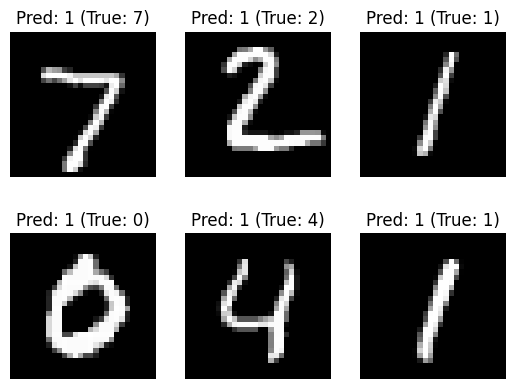

In [ ]:
examples = iter(test_loader)
images, labels = next(examples)

# Get model predictions
with torch.no_grad():
    outputs = model(images)
    _, predictions = torch.max(outputs, 1)

# Plot some predictions
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(f'Pred: {predictions[i].item()} (True: {labels[i].item()})')
    plt.axis('off')
plt.show()




---



---

## Submission guidelines
---
Download the .ipynb file to a folder of your preference. All you need to do is to fill in the blanks as indicated.

When submitting your .zip file through brightspace, please
-- name your .zip file as **Surname_Givenname_SBUID_hw1.zip**.

This zip file should include:
```
Surname_Givenname_SBUID_hw*
        |---Surname_Givenname_SBUID_hw#*.ipynb
        |---Surname_Givenname_SBUID_hw#*.pdf
```

For instance, student Bill Gates should submit a zip file named "Gates_Bill_111134567_hw3.zip" for homework3 in this structure:
```
Gates_Bill_111134567_hw3
        |---Gates_Bill_111134567_hw3.ipynb
        |---Gates_Bill_111134567_hw3.pdf
```

The **Surname_Givenname_SBUID_hw#*.pdf** should only include a **google shared link**. To generate the **google shared link**, first create a folder named **Surname_Givenname_SBUID_hw#*** in your Google Drive with your Stony Brook account. The structure of the files in the folder should be exactly the same as the one you downloaded. If you alter the folder structures, the grading of your homework will be significantly delayed and possibly penalized.

Then right click this folder, click ***Get shareable link***, in the People textfield, enter TA's emails: **sagajjala@cs.stonybrook.edu**. Make sure that TA ***Jashwanth Gajjala*** has the link and **can edit**, ***not just*** **view**, and also **uncheck** the **Notify people** box.

Colab has a good feature of version control, you should take advantage of this to save your work properly. However, the timestamp of the submission made in blackboard is the only one that we consider for grading. To be more specific, we will only grade the version of your code right before the timestamp of the submission made in blackboard.

You are encouraged to post and answer questions on Piazza. Based on the amount of email that we have received in past years, there might be delays in replying to personal emails. Please ask questions on Piazza and send emails only for personal issues. Also feel free to drop by the TAs office hours.

Be aware that your code will undergo plagiarism check both vertically and horizontally. Please do your own work.


---
---
